In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [5]:
data = pd.read_csv('russian_demography.csv')
print(data.head())

# Удалим строки с пропущенными значениями
data.dropna(inplace=True)

# Выберем входные параметры (объясняющие переменные) и целевую переменную
X = data[['birth_rate', 'death_rate', 'gdw', 'urbanization']]
y = data['npg']

   year              region  npg  birth_rate  death_rate    gdw  urbanization
0  1990  Republic of Adygea  1.9        14.2        12.3  84.66         52.42
1  1990          Altai Krai  1.8        12.9        11.1  80.24         58.07
2  1990         Amur Oblast  7.6        16.2         8.6  69.55         68.37
3  1990  Arkhangelsk Oblast  3.7        13.5         9.8  73.26         73.63
4  1990    Astrakhan Oblast  4.7        15.1        10.4  77.05         68.01


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Коэффициенты:', model.coef_)
print('Свободный член:', model.intercept_)

# Оценка модели
print('\nСреднеквадратическая ошибка: ')
root_mean_squared_error(y_test, y_pred)

Коэффициенты: [ 1.00549802e+00 -9.96735208e-01 -1.03320101e-03  1.19489764e-04]
Свободный член: -0.0375265745304727

Среднеквадратическая ошибка: 


np.float64(0.12083021503439077)

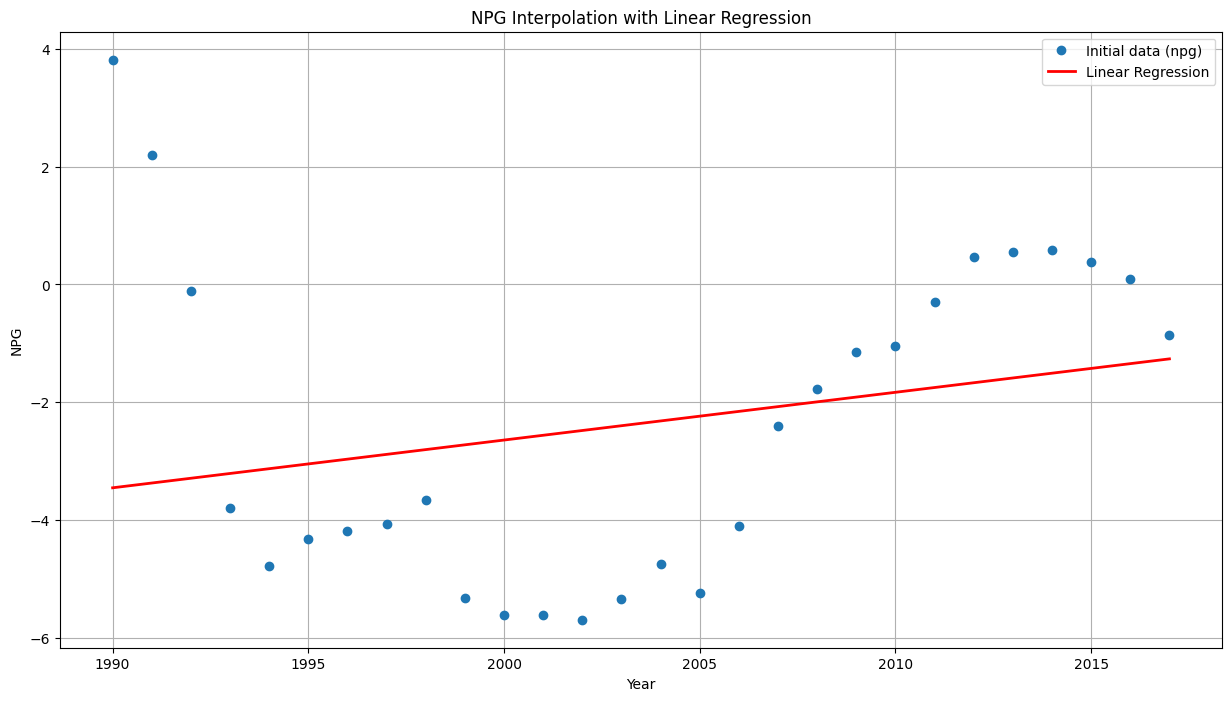

In [ ]:
avrg_npg = data.groupby('year')['npg'].mean().reset_index()
years = avrg_npg['year'].values.reshape(-1, 1)
npg = avrg_npg['npg'].values

model = LinearRegression()
model.fit(years, npg)

npg_pred = model.predict(years)

x_new = np.linspace(years.min(), years.max(), num=100).reshape(-1, 1)
npg_regression = model.predict(x_new)

plt.figure(figsize=(15, 8))
plt.plot(years, npg, 'o', label='Initial data (npg)')
plt.plot(x_new, npg_regression, color='red', label='Linear Regression', linewidth=2)
plt.title('График npg по годам с линейной регрессией')
plt.xlabel('Год')
plt.ylabel('NPG')
plt.legend()
plt.grid()
plt.show()

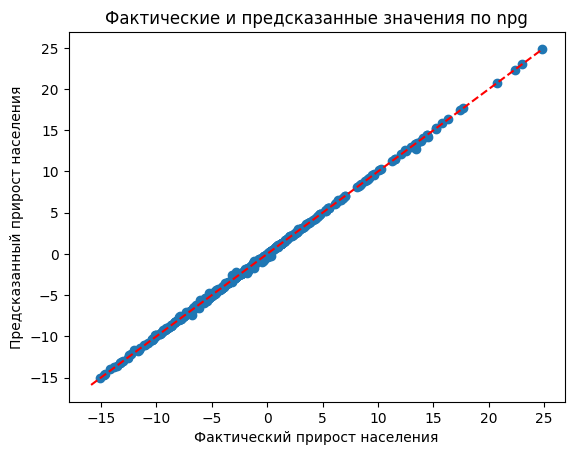

In [7]:
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Фактический прирост населения')
plt.ylabel('Предсказанный прирост населения')
plt.title('Фактические и предсказанные значения по npg')
plt.show()

In [8]:
def get_float_input(prompt):
    while True:
        try:
            value = float(input(prompt))
            return value
        except ValueError:
            print("Ошибка: введите корректное числовое значение.")

def predict_from_input():
    print("Введите значения для следующих параметров:")

    birth_rate = get_float_input("Рождаемость (birth_rate): ")
    death_rate = get_float_input("Смертность (death_rate): ")
    gdw = get_float_input("Общий демографический вес (gdw): ")
    urbanization = get_float_input("Урбанизация (urbanization): ")

    input_data = pd.DataFrame([[birth_rate, death_rate, gdw, urbanization]], 
                               columns=['birth_rate', 'death_rate', 'gdw', 'urbanization'])

    # Предсказание
    prediction = model.predict(input_data)
    print(f'Предсказанный прирост населения (npg): {round(prediction[0], 2)}')

# Вызов функции
predict_from_input()


Введите значения для следующих параметров:
Предсказанный прирост населения (npg): 100.42
